In [2]:
R.version$version.string

[1] "R version 4.2.0 (2022-04-22)"

In [3]:
# load packages
for (p in c("plyr", "gamm4")){
        if(!eval(parse(text=paste("require(",p,")")))) {
                install.packages(p)
                lapply(p,library,character.only=TRUE)
        }
}

Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: gamm4

Loading required package: Matrix

Loading required package: lme4

Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.2.3”
Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

This is gamm4 0.2-6




In [4]:
# specify imaging outcome of interest
img_pheno = 'rsi_rni_aseg';
var_interest = 'dmri_rsirni_scs_pllh';

# specify paths
fname_design = '/space/syn50/1/data/ABCD/d9smith/age/results_2024-01-22/designMat4_BFsSexIncEducHispPCsScanSoftMotion_bly2y4.txt';
fname_basis = '/space/syn50/1/data/ABCD/d9smith/age/basis.txt';

outpath = "/home/d9smith/projects/age/plots/r";   

imaging_path = '/space/syn65/1/data/abcd-sync/5.0/tabulated/released/core/imaging'

In [5]:
# load tabulated imaging data and combine with design matrix
imaging_file = paste0(imaging_path, '/mri_y_', img_pheno, '.csv')
imaging = read.delim(imaging_file, sep = ',')

imaging_vars = c('src_subject_id', 'eventname', var_interest)
imaging = imaging[,imaging_vars]

tbl_design = read.delim(fname_design)
tbl_design = join(tbl_design, imaging, by = c('src_subject_id', 'eventname'))

In [6]:
plot_df = na.omit(tbl_design)
attach(plot_df)

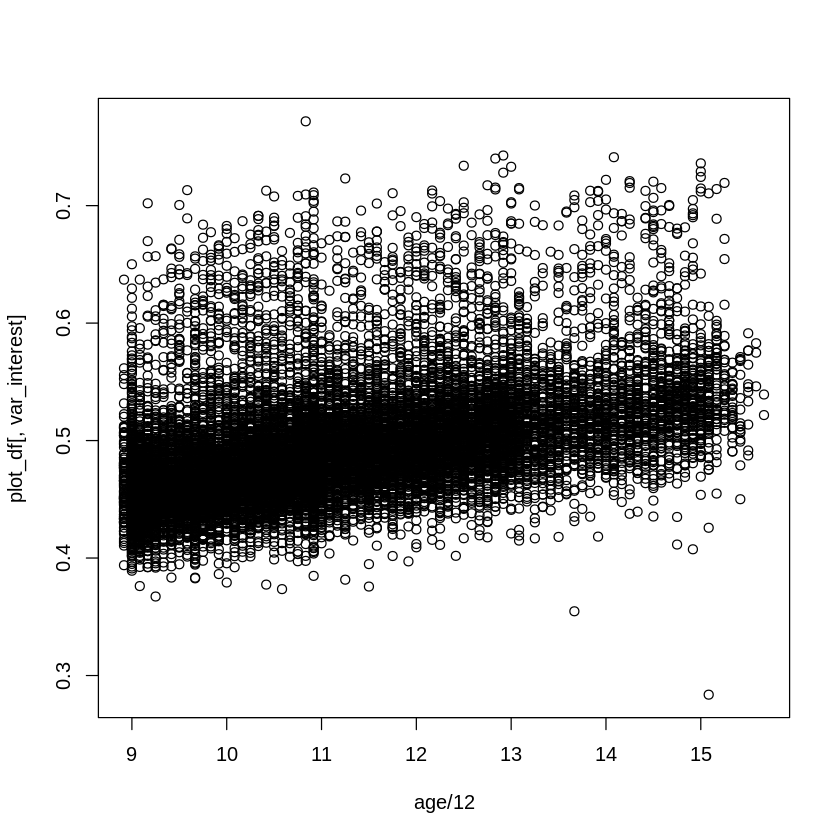

In [7]:
# visualize variable of interest and fit smooth spline function
plot(age/12, plot_df[,var_interest])

In [8]:
list(names(plot_df)[9:76])

[[1]]
 [1] "PC1"                                                                      
 [2] "PC2"                                                                      
 [3] "PC3"                                                                      
 [4] "PC4"                                                                      
 [5] "PC5"                                                                      
 [6] "PC6"                                                                      
 [7] "PC7"                                                                      
 [8] "PC8"                                                                      
 [9] "PC9"                                                                      
[10] "PC10"                                                                     
[11] "dmri_meanmotion"                                                          
[12] "household.income_cont"                                                    
[13] "sexI"                                                                     
[14] "sexM"                                                                     
[15] "high.educBachelor"                                                        
[16] "high.educHS.Diploma.GED"                                                  
[17] "high.educPost.Graduate.Degree"                                            
[18] "high.educSome.College"                                                    
[19] "hispYes"                                                                  
[20] "mri_info_deviceserialnumberHASH03db707f"                                  
[21] "mri_info_deviceserialnumberHASH11ad4ed5"                                  
[22] "mri_info_deviceserialnumberHASH1314a204"                                  
[23] "mri_info_deviceserialnumberHASH311170b9"                                  
[24] "mri_info_deviceserialnumberHASH31ce566d"                                  
[25] "mri_info_deviceserialnumberHASH3935c89e"                                  
[26] "mri_info_deviceserialnumberHASH4036a433"                                  
[27] "mri_info_deviceserialnumberHASH48f7cbc3"                                  
[28] "mri_info_deviceserialnumberHASH4b0b8b05"                                  
[29] "mri_info_deviceserialnumberHASH4d1ed7b1"                                  
[30] "mri_info_deviceserialnumberHASH5ac2b20b"                                  
[31] "mri_info_deviceserialnumberHASH5b0cf1bb"                                  
[32] "mri_info_deviceserialnumberHASH5b2fcf80"                                  
[33] "mri_info_deviceserialnumberHASH65b39280"                                  
[34] "mri_info_deviceserialnumberHASH69f406fa"                                  
[35] "mri_info_deviceserialnumberHASH6b4422a7"                                  
[36] "mri_info_deviceserialnumberHASH7911780b"                                  
[37] "mri_info_deviceserialnumberHASH7f91147d"                                  
[38] "mri_info_deviceserialnumberHASH96a0c182"                                  
[39] "mri_info_deviceserialnumberHASHa3e45734"                                  
[40] "mri_info_deviceserialnumberHASHb640a1b8"                                  
[41] "mri_info_deviceserialnumberHASHc3bf3d9c"                                  
[42] "mri_info_deviceserialnumberHASHc9398971"                                  
[43] "mri_info_deviceserialnumberHASHd422be27"                                  
[44] "mri_info_deviceserialnumberHASHd7cb4c6d"                                  
[45] "mri_info_deviceserialnumberHASHdb2589d4"                                  
[46] "mri_info_deviceserialnumberHASHe3ce02d3"                                  
[47] "mri_info_deviceserialnumberHASHe4f6957a"                                  
[48] "mri_info_deviceserialnumberHASHe76e6d72"                                  
[49] "mri_info_deviceserialnumberHASHfeb7e81a"                                  
[50] "mri_info_deviceseri

In [9]:
form = paste(var_interest, ' ~ s(age) + ', paste(names(plot_df)[9:76], collapse = ' + '))
form

[1] "dmri_rsirni_scs_pllh  ~ s(age) +  PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + dmri_meanmotion + household.income_cont + sexI + sexM + high.educBachelor + high.educHS.Diploma.GED + high.educPost.Graduate.Degree + high.educSome.College + hispYes + mri_info_deviceserialnumberHASH03db707f + mri_info_deviceserialnumberHASH11ad4ed5 + mri_info_deviceserialnumberHASH1314a204 + mri_info_deviceserialnumberHASH311170b9 + mri_info_deviceserialnumberHASH31ce566d + mri_info_deviceserialnumberHASH3935c89e + mri_info_deviceserialnumberHASH4036a433 + mri_info_deviceserialnumberHASH48f7cbc3 + mri_info_deviceserialnumberHASH4b0b8b05 + mri_info_deviceserialnumberHASH4d1ed7b1 + mri_info_deviceserialnumberHASH5ac2b20b + mri_info_deviceserialnumberHASH5b0cf1bb + mri_info_deviceserialnumberHASH5b2fcf80 + mri_info_deviceserialnumberHASH65b39280 + mri_info_deviceserialnumberHASH69f406fa + mri_info_deviceserialnumberHASH6b4422a7 + mri_info_deviceserialnumberHASH7911780b + mri_info_deviceserialnumberHASH7f91147d + mri_info_deviceserialnumberHASH96a0c182 + mri_info_deviceserialnumberHASHa3e45734 + mri_info_deviceserialnumberHASHb640a1b8 + mri_info_deviceserialnumberHASHc3bf3d9c + mri_info_deviceserialnumberHASHc9398971 + mri_info_deviceserialnumberHASHd422be27 + mri_info_deviceserialnumberHASHd7cb4c6d + mri_info_deviceserialnumberHASHdb2589d4 + mri_info_deviceserialnumberHASHe3ce02d3 + mri_info_deviceserialnumberHASHe4f6957a + mri_info_deviceserialnumberHASHe76e6d72 + mri_info_deviceserialnumberHASHfeb7e81a + mri_info_deviceserialnumberTBC_UWM + mri_info_softwareversion27.LX.MR.Software.release.DV25.1_R01_1617.b + mri_info_softwareversion27.LX.MR.Software.release.DV26.0_EB_1707.b + mri_info_softwareversion27.LX.MR.Software.release.DV26.0_R01_1725.a + mri_info_softwareversion27.LX.MR.Software.release.DV26.0_R02_1810.b + mri_info_softwareversion27.LX.MR.Software.release.DV26.0_R03_1831.b + mri_info_softwareversion27.LX.MR.Software.release.DV26.0_R05_2008.a + mri_info_softwareversion28.LX.MR.Software.release.RX28.0_R04_UHP3T_2111.a + mri_info_softwareversion5.3.0.5.3.0.0 + mri_info_softwareversion5.3.0.5.3.0.3 + mri_info_softwareversion5.3.1.5.3.1.0 + mri_info_softwareversion5.3.1.5.3.1.1 + mri_info_softwareversion5.3.1.5.3.1.2 + mri_info_softwareversion5.3.1.5.3.1.3 + mri_info_softwareversion5.4.0.5.4.0.1 + mri_info_softwareversion5.4.1.5.4.1.1 + mri_info_softwareversion5.6.1.5.6.1.1 + mri_info_softwareversion5.6.1.5.6.1.2 + mri_info_softwareversion5.6.1.5.6.1.3"

ERROR: Error in model.frame.default(formula = var_interest ~ (age), drop.unused.levels = TRUE): variable lengths differ (found for 'age')


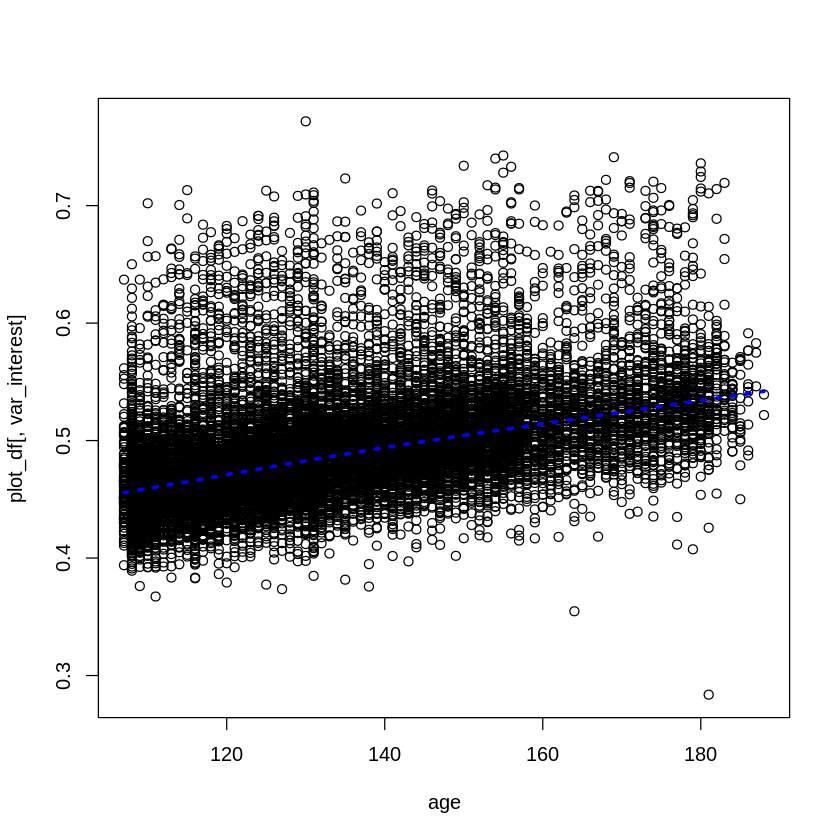

In [10]:
scatter.smooth(age, plot_df[,var_interest], lpars = list(col = "blue", lwd = 3, lty = 3))
abline(lm(var_interest~(age), col='red',lwd=3))
legend('topright', c('Linear','Smoothing'), lty=c(1,2), lwd=c(3,3), col=c('red','blue')) 

In [11]:
knots = c(125,150,175)
random='~(1|rel_family_id/src_subject_id)'
dat = plot_df

In [ ]:
# tools::package_dependencies("Matrix", which = "LinkingTo", reverse = TRUE)[[1L]]
# install.packages("lme4", type = "source") # this is in response to an error i got referencing the Matrix package

# oo <- options(repos = "https://cran.r-project.org/")
# install.packages("Matrix")
# install.packages("lme4")
# options(oo)


# packageurl <- "https://cran.r-project.org/src/contrib/Archive/Matrix/Matrix_1.6-3.tar.gz"
# install.packages(packageurl, repos=NULL, type="source")

In [12]:
# mapply(gamm4(formula, knots = c(125,150,175), random='~(1|abcd_site/rel_family_id)', data=plot_df))
# results = mapply(gamm4_link, form=unique_reduced, distribution=model_table$distribution[1:length(unique_reduced)], random=model_table$random_effects[1:length(unique_reduced)], MoreArgs=list(dat=df))   
results = gamm4(formula=formula(form), 
                random=formula(random), 
                data=dat, 
                # knots = knots, 
                family=Gamma(link = "log"))

Warning message:
“Some predictor variables are on very different scales: consider rescaling”
Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
“failure to converge in 10000 evaluations”
Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
“convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations”


ERROR: Error in pwrssUpdate(pp, resp, tol = tolPwrss, GQmat = GQmat, compDev = compDev, : Downdated VtV is not positive definite
